In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def z_normalize(x):
  m,n = x.shape
  mean = np.zeros(n)
  std = np.zeros(n)
  for i in range(n):
    mean[i] = np.mean(x[:,i])
    std[i] = np.std(x[:,i])
    x[:,i] = (x[:,i] - mean[i])/std[i]
  return x

In [3]:
def mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

In [4]:
def linear_training_data(path):
  path = path.strip("'")
  df = pd.read_csv(path)

  u,v = df.shape
  v -= 2
  a_start = int(input("give the starting index of training data:"))
  a_end = int(input("give the ending index of training data:"))
  a = a_end - a_start
  x = np.zeros((a,v))
  y = np.zeros(a)

  df = df.iloc[a_start:a_end,:]
  x = df[df.columns[1:-1]].to_numpy()
  y = df[df.columns[-1]].to_numpy()
  x = z_normalize(x)

  return (x,y)

In [10]:
def linear_test_data(path_test):
  path_test = path_test.strip("'")
  df_test = pd.read_csv(path_test)

  u_test,v_test = df_test.shape
  v_test -= 1
  x_test = np.zeros((u_test,v_test))
  y_hat = np.zeros(u_test)

  df_test = df_test.iloc[:,1:]
  x_test = df_test[df_test.columns[:]].to_numpy()

  return (x_test,y_hat)

In [6]:
x_linear_train , y_linear_train = linear_training_data('/content/linear_train.csv')

give the starting index of training data:0
give the ending index of training data:1500


In [7]:
x_cv , y_cv = linear_training_data('/content/linear_train.csv')

give the starting index of training data:1500
give the ending index of training data:2000


In [11]:
x_test,y_test = linear_test_data('/content/linear_test_data.csv')

In [12]:
def multi_cost(x,y,w,b):
  m,n = x.shape
  cost=0
  for i in range(m):
    f_wb = np.dot(x[i],w)+b
    cost = cost + (f_wb - y[i])**2
  cost = cost/(2*m)
  return cost

In [13]:
def multi_gradient(x,y,w,b):
  m,n = x.shape
  dj_dw=np.zeros((n,))
  dj_db=0
  for i in range(m):
    f_wb = np.dot(x[i],w)+b
    dj_db = dj_db + (f_wb - y[i])
    for j in range(n):
      dj_dw[j] = dj_dw[j] + (f_wb - y[i])*x[i,j]
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  return dj_dw,dj_db

In [14]:
def multi_gradient_descent(x,y,w,b,alpha,num_itr):
  m,n = x.shape
  cost_value = []
  w_history = []
  for i in range(num_itr):
    dj_dw,dj_db = multi_gradient(x,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    if i<100000:
      cost_value.append(multi_cost(x,y,w,b))
    if i%math.ceil(num_itr/10)==0:
      print(f"Iteration {i:4}: Cost {cost_value[-1]:8.2f}")
      w_history.append(w)
  return w,b,cost_value,w_history

In [15]:
def Multi_Linear_Regression(x_linear_train ,y_linear_train):
  u_train,v_train = x_linear_train.shape

  w_linear = np.zeros(v_train)
  b_linear = 0
  alpha_linear = float(input("give the value of alpha:"))
  num_itr_linear = int(input("give the number of iteration:"))
  w_linear,b_linear,cost_value,w_history = multi_gradient_descent(x_linear_train,y_linear_train,w_linear,b_linear,alpha_linear,num_itr_linear)
  print(w_linear,b_linear)

  fig, (ax1) = plt.subplots()
  ax1.plot(cost_value)
  ax1.set_xlabel('iteration')
  ax1.set_ylabel('cost')
  ax1.set_title('cost vs Iteration')
  plt.show()
  return(w_linear,b_linear)

give the value of alpha:0.01
give th number of iteration:1500
Iteration    0: Cost 29805.27
Iteration  150: Cost  5689.63
Iteration  300: Cost  4689.84
Iteration  450: Cost  4636.92
Iteration  600: Cost  4633.88
Iteration  750: Cost  4633.69
Iteration  900: Cost  4633.68
Iteration 1050: Cost  4633.68
Iteration 1200: Cost  4633.68
Iteration 1350: Cost  4633.68
[66.16818578 69.22821291 95.68336797  2.43972089 20.82932011 26.15665856
 69.46199323 30.99290401 22.24444941 93.0178273  40.30817717 35.74495
  1.9931825  40.96146428 40.96146428 49.77375374 27.86716287 33.03472568
 32.88035853 34.13346761] 4.065941473684987


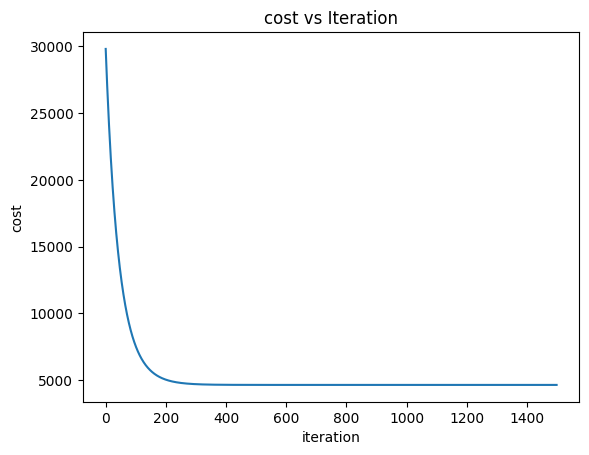

In [16]:
w_linear , b_linear = Multi_Linear_Regression(x_linear_train ,y_linear_train)

In [17]:
y_pred = np.dot(x_cv,w_linear)+b_linear

In [18]:
print(f"Mean Squared Error: {mse(y_cv,y_pred)}")

Mean Squared Error: 10181.176726496002


In [21]:
y_hat_linear = np.dot(x_test,w_linear)+b_linear

In [23]:
np.savetxt("y_hat_linear.csv", y_hat_linear, delimiter=",")